CHAPTER 07 딥러닝을 시작합니다  
07-2 심층 신경망

In [7]:
# 데이터셋 불러오기
from keras.datasets import fashion_mnist

(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()


In [8]:
# 데이터 표준화(0~1) 및 1차원 배열로 변환
from sklearn.model_selection import train_test_split

train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

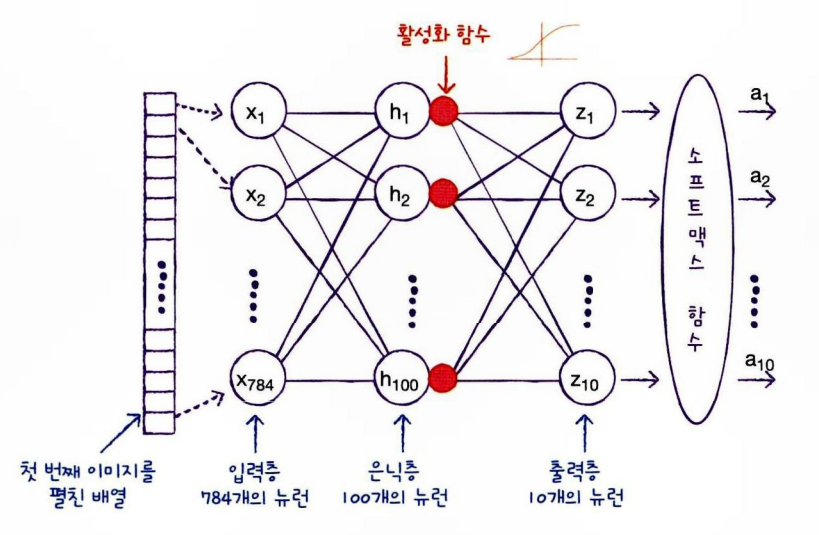

[은닉층]  
입력층과 출력층 사이에 있는 모든 층을 의미  
- 출력층에 적용한 활성화 함수는 종류가 제한되어 있음(이진 분류: 시그모이드/다중 분류: 소프트맥스)  
- 은닉층의 활성화 함수는 비교적 자유로움(시그모이드, 렐루 등)

[회귀를 위한 신경망의 출력층에서는 활성화 함수가 사용되지 않는다]  
: 분류 문제는 클래스에 대한 확률을 출력하기 위해 출력층에 활성화 함수를 사용  
: 회귀의 출력은 임의의 어떤 숫자이므로 활성화 함수를 적용할 필요가 없음 

In [ ]:
# 입력층, 은닉층, 출력층 만들기
import keras
inputs = keras.layers.Input(shape=(784,)) # 입력층
dense1 = keras.layers.Dense(100, activation='sigmoid') # 은닉층(출력층의 뉴런보다는 많이 만들어야 함)
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층

In [12]:
# 심층 신경망 만들기
model = keras.Sequential([inputs, dense1, dense2])

In [14]:
model.summary() # 층 정보(모델의 입력층 제외한 층 순서대로 나열)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

[출력크기가 (None, 100)인 이유?]  
: 첫 번째 차원은 샘플의 개수 나타냄  
> fit() 메서드에 훈련 데이터를 주입하면 경사 하강법 단계를 수행하므로 아직 샘플 개수가 정의되어 있지 않기 때문 

In [ ]:
# 층을 추가하는 다른 방법
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='sigmoid', name='은닉층'), # 층의 이름 지정
    keras.layers.Dense(10, activation='softmax', name='출력층')
], name='패션 MNIST 모델')  # name 매개변수르 모델의 이름 지정

In [17]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 은닉층 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 출력층 (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 가장 널리 사용되는 Sequential 클래스 층 추가 방법
# add() 매서드
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 설정 및 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7517 - loss: 0.7671
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8487 - loss: 0.4192
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8635 - loss: 0.3796
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3520
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8791 - loss: 0.3347


[렐루 함수]  
: 입력이 양수일 경우 입력 통과, 음수일 경우 0으로 만듦  
: 이미지 처리에서 좋은 성능을 냄  
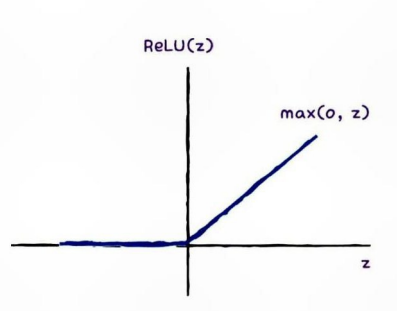

In [ ]:
# 입력 차원을 일렬로 펼치는 Flatten() 클래스 사용
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28))) # reshape 하지 않은 2차원 데이터 원본 이미지 input
model.add(keras.layers.Flatten()) # Flatten() 클래스 입력층 바로 뒤에 추가
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층에 렐루 함수 사용
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 훈련 데이터 다시 준비_reshape() 메서드 적용하지 않은 버전
from keras.datasets import fashion_mnist 
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

# 데이터 표준화
train_scaled = train_input/255.0

# 훈련, 검증 데이터 나누기
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [29]:
# 모델 컴파일 및 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7618 - loss: 0.6753
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8568 - loss: 0.4018
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.3587
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8808 - loss: 0.3271
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8869 - loss: 0.3165


In [30]:
# 검증 세트 성능 확인 
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8731 - loss: 0.3622


[0.36535242199897766, 0.871833324432373]

[옵티마이저]  
: 케라스가 제공하는 다양한 종류의 경사 하강법 알고리즘  
: 가장 기본적인 옵티마이저 = 확률적 경사하강법(SGD) 

[신경망에는 사람이 지정해주어야 하는 하이퍼파라미터가 많음]  
- 은닉층의 개수  
- 은닉층의 뉴런 개수  
- 활성화 함수  
- 층의 종류  
- 미니배치 경사 하강법의 미니배치 개수 : 기본값 32개, fit() 매서드의 batch_size 매개변수에서 조정 가능   
- 옵티마이저 학습률 


In [ ]:
# 모델 다시 생성
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Adam 클래스의 매개변수 기본값을 사용한 모델 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7672 - loss: 0.6812
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8583 - loss: 0.4018
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8688 - loss: 0.3635
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8835 - loss: 0.3204
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8866 - loss: 0.3073


In [34]:
# 검증 세트 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8777 - loss: 0.3461


[0.34602636098861694, 0.8758333325386047]